# k-NN

by Kirill Bykov, Oleg Vlasovets, Ilya

In [1]:
#imports
import pandas as pd #pandas for reading csv file
import numpy as np  #numpy for vectorising
from random import randrange
import seaborn as sns
from scipy.spatial import distance_matrix
from tqdm import tqdm
import warnings
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_MNIST(file_path):
    df = pd.read_csv(file_path, header = None)
    Y = np.array(df[0])
    X = np.array(df.iloc[:,1:])
    return X, Y

def distance(A, B, metric = "euclidean"):
    if metric == "euclidean":
        return np.linalg.norm(A-B)

def first_most_frequent(arr):
    c = 0
    num = arr[0]
    for i in arr:
        amount_times = arr.count(i)
        if amount_times > c:
            c = amount_times
            num = i
    return num

def accuracy(Y_pred, Y_true):
    return np.mean(1 - np.equal(Y_true, Y_pred, dtype=int))

In [3]:
class kNN:
    
    def __init__(self, X_train, Y_train, p = 2):
        self.X_train = X_train
        self.Y_train = Y_train
        self.length = len(X_train)
        self.p = p
        self.inner_distances_calculated = False
        
    def set_minkovsky_parameter(self, p):
        self.p = p
        self.inner_distances_calculated = False
        
    def vote(self, NN):
        n = len(NN)
        votes = np.zeros(n).astype(int)
        for i in range(0, n):
            votes[i] = first_most_frequent([self.Y_train[j] for j in NN[i]])
        return votes
    
    def predict(self, X_test, k):
        n_test = len(X_test)
        D = np.zeros((n_test, self.length))
        NN = np.zeros((n_test,k)).astype(int)
        D = distance_matrix(X_test, self.X_train, self.p)
        for i in range(0, n_test):
            NN[i] = D[i].argsort()[:k]
        return self.vote(NN)
    
    def LOOCV(self, k):
        if not self.inner_distances_calculated:
            print("Calculating distances. This could take some time ...")
            self.inner_distances = distance_matrix(X_train, X_train, self.p);
            self.inner_NN = np.zeros((self.length,self.length)).astype(int)
            for i in range(0,self.length):
                self.inner_NN[i] = self.inner_distances[i].argsort()
            self.inner_distances_calculated = True

        return self.vote(self.inner_NN[:,1:k+1])
    
    def LOOCV_big(self, k):
        if not self.inner_distances_calculated or self.inner_NN.shape[1]<k:
            print("Calculating distances. This could take some time ...")
            self.inner_NN = []
            for i in range(self.length):
                D = distance_matrix([X_train[i]], X_train, self.p);
                NN = D[0].argsort()[1:k+1]
                self.inner_NN.append(NN)
            self.inner_NN = np.array(self.inner_NN)
        
        return self.vote(self.inner_NN[:,:k])

### a)

100%|██████████| 20/20 [22:52<00:00, 76.75s/it]


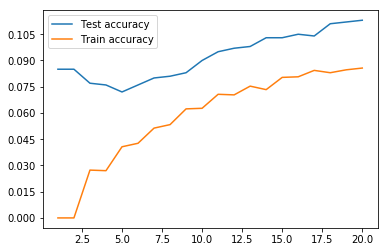

In [4]:
results_test = []
results_train = []
X_train, Y_train = read_MNIST("data/MNIST_train_small.csv")
X_test, Y_test = read_MNIST("data/MNIST_test_small.csv")
classifier = kNN(X_train, Y_train)

for k in tqdm(range(1,21)):
    Y_pred_test = classifier.predict(X_test, k)
    results_test.append(accuracy(Y_pred_test, Y_test))
    
    Y_pred_train = classifier.predict(X_train, k)
    results_train.append(accuracy(Y_pred_train, Y_train))

ax = sns.lineplot(x=[i for i in range(1,21)], y=results_test, label = 'Test accuracy')
ax = sns.lineplot(x=[i for i in range(1,21)], y=results_train, label = 'Train accuracy')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Сделайте только картинку получше

## LOOCV

*LOOCV* --- метод, который в первый раз считает расстояния между всеми точками, а затем при различных k использует уже посчитанную матрицу расстояний. Так как в памяти храним все расстояния, работает быстро, но только для маленьгоко датасета

*LOOCV_big* --- метод для работы с большими датасетами, нужно запускать начиная с максимального k, так как на первом запуске держим в памяти только соседей, и не надо пересчитывать это все для маленьких k

### b)

  0%|          | 0/20 [00:00<?, ?it/s]

Calculating distances. This could take some time ...


100%|██████████| 20/20 [00:37<00:00,  1.89s/it]


[0.08066666666666666, 0.08066666666666666, 0.073, 0.073, 0.07833333333333334, 0.079, 0.08166666666666667, 0.08233333333333333, 0.08333333333333333, 0.08866666666666667, 0.088, 0.089, 0.09233333333333334, 0.093, 0.09433333333333334, 0.095, 0.09566666666666666, 0.09566666666666666, 0.098, 0.09833333333333333]


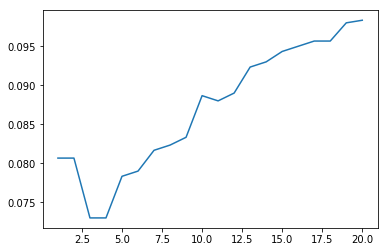

In [5]:
LOOCV_results = []
X_train, Y_train = read_MNIST("data/MNIST_train_small.csv")
classifier = kNN(X_train, Y_train)

for k in tqdm(range(1,21)):
    Y_pred = classifier.LOOCV(k)
    LOOCV_results.append(accuracy(Y_pred, Y_train))

ax = sns.lineplot(x=[i for i in range(1,21)], y=LOOCV_results)
print(LOOCV_results)

### c)

In [19]:
LOOCV_results_Mink = []
X_train, Y_train = read_MNIST("data/MNIST_train_small.csv")
classifier = kNN(X_train, Y_train)

for p in tqdm(range(1,8)):
    classifier.set_minkovsky_parameter(p)
    for k in range(1,21):
        Y_pred = classifier.LOOCV(k)
        LOOCV_results_Mink.append(accuracy(Y_pred, Y_train))

  0%|          | 0/7 [00:00<?, ?it/s]

Calculating distances. This could take some time ...


 14%|█▍        | 1/7 [00:29<02:57, 29.60s/it]

Calculating distances. This could take some time ...


 29%|██▊       | 2/7 [01:06<02:39, 31.93s/it]

Calculating distances. This could take some time ...


 43%|████▎     | 3/7 [01:54<02:25, 36.47s/it]

Calculating distances. This could take some time ...


 57%|█████▋    | 4/7 [02:50<02:07, 42.48s/it]

Calculating distances. This could take some time ...


 71%|███████▏  | 5/7 [03:46<01:32, 46.46s/it]

Calculating distances. This could take some time ...


 86%|████████▌ | 6/7 [04:43<00:49, 49.80s/it]

Calculating distances. This could take some time ...


100%|██████████| 7/7 [05:39<00:00, 51.58s/it]


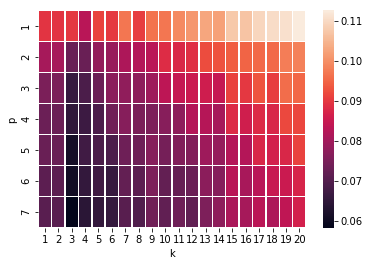

In [20]:
ax = sns.heatmap(np.reshape(LOOCV_results_Mink,(7,20)), linewidth=0.5)
plt.xlabel('k')
plt.ylabel('p')
ax.set_xticklabels(range(1,21))
ax.set_yticklabels(range(1,16))
plt.show()